# Aprendendo Correlação

![Correlação](correlacao.jpg)

**Neste notebook vamos explorar o conceito de correlação através do dataset contabilidade. Abaixo segue a descrição dos atributos:**

* N: Identicador para cada pessoa, de 1 até 120 
* IDADE: Idade em anos (Varialvel Quantitativa Numerica Discreta)
* PROFI: Profissão (Varialvel Qualitativa Nominal)
* ESTCIVIL: Estado Civil {1:solteiro, 2:casado , 3:divorciado} (Varialvel Qualitativa Nominal)
* ESCOLAR: Escolaridade (Varialvel Qualitativa Ordinal)
* ANESTUD: Anos de estudo (Varialvel Qualitativa)
* RENDA: Renda familiar em classes 1, 2, 3, 4 (Varialvel Qualitativa Ordinal)
* GASAUDE: Gasto com saúde (Variavel Numerica Continua)
* GASLAZER: Gasto com lazer (Variavel Numerica Continua
* GASTEDU: Gasto com educação (Variavel Quantitativa Numerica Continua
* NUNFILHOS: Quantidade de Filhos (Varialvel Quantitativa Numerica Discreta)

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['figure.dpi'] = 150

### Importando o dataset contabilidade.csv

In [3]:
df = pd.read_csv('contabilidade.csv')

In [4]:
# dimensão
df.shape

(120, 11)

In [5]:
# Ver os atributos do dataset contavilidade
for attr in df.columns:
    print(attr)

N
IDADE
PROFI
ESTCIVIL
ESCOLAR
ANESTUD
RENDA
GASAUDE
GASLAZER
GASTEDU
NUNFILHOS


In [6]:
# ver as 3 primeiras linhas do dataset
df.head(3)

,N,IDADE,PROFI,ESTCIVIL,ESCOLAR,ANESTUD,RENDA,GASAUDE,GASLAZER,GASTEDU,NUNFILHOS
0,1,22,2,1,6,5,2,94.1,117.5,97.5,3
1,2,28,2,1,6,5,3,242.6,205.8,186.4,1
2,3,20,1,3,6,5,3,147.2,204.5,153.8,1


## Correlação Numérica vs. Numérica

Vamos trabalhar com as quatros variaveis quantitativas abaixo:
* Idade
* GASAUDE
* GASLAZER
* GASTEDU

#plt.style.use('ggplot')
#plt.style.use('bmh')
#plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')
#plt.style.use('grayscale')


### 1. Será que existe relação entre a IDADE e o GASTO COM SAÚDE?

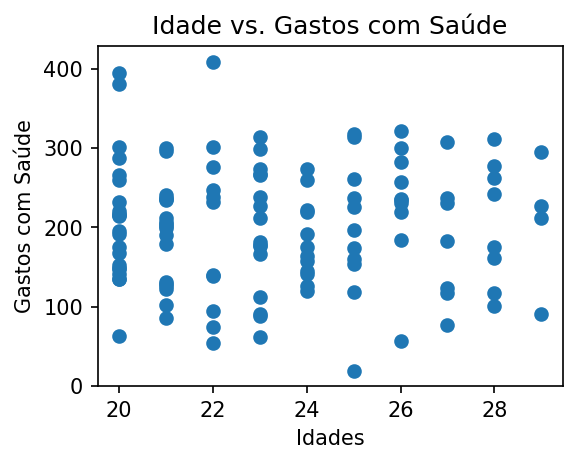

In [7]:
X = df['IDADE']
y = df['GASAUDE']
plt.scatter(X, y)
plt.title('Idade vs. Gastos com Saúde')
plt.xlabel('Idades')
plt.ylabel('Gastos com Saúde')
plt.show()

***Observamos que não existe relação linear entre idade e o gasto com a saúde, fundamental entender, o fato de não existir relação linear entre ambas NÃO SIGNIFICA que não exista alguma relação entre as variaveis(idade vs. gastos com saúde)***

### 2. Será que existe relação entre o GASTO COM LAZER e GASTO COM SAÚDE?

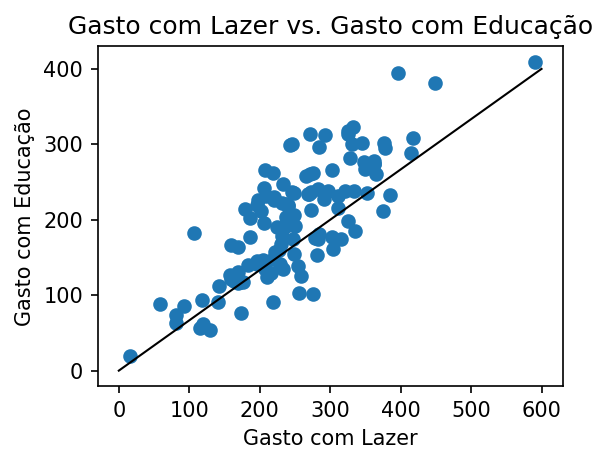

In [8]:
X = df['GASLAZER']
y = df['GASAUDE']
plt.scatter(X, y)
plt.title('Gasto com Lazer vs. Gasto com Educação')
plt.xlabel('Gasto com Lazer')
plt.ylabel('Gasto com Educação')
plt.plot([0, 600], [0, 400], 'k-', lw=1);

**Bem, precebemo que existe uma relação linear entre Gasto com Lavez vs. Gasto com Educação**
### Agora vamos melhorar nossa analise
* Adicionando uma nova dimensão com o atributo color
   * Primeiro vamos fazer a analise com atributo **profissão**

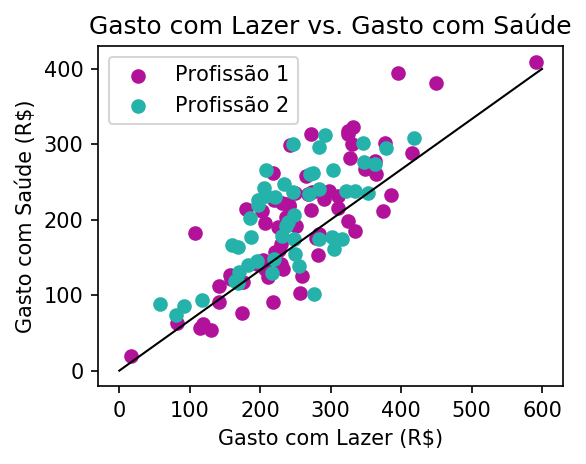

In [9]:
p1 = plt.scatter(df[df['PROFI'] == 1]['GASLAZER'], df[df['PROFI'] == 1]['GASAUDE'], color='#B21299')
p2 = plt.scatter(df[df['PROFI'] == 2]['GASLAZER'], df[df['PROFI'] == 2]['GASAUDE'], color='#24B2AA')
plt.title('Gasto com Lazer vs. Gasto com Saúde')
plt.xlabel('Gasto com Lazer (R$)')
plt.ylabel('Gasto com Saúde (R$)')
plt.legend((p1, p2), ('Profissão 1', 'Profissão 2'))
plt.plot([0, 600], [0, 400], 'k-', lw=1);

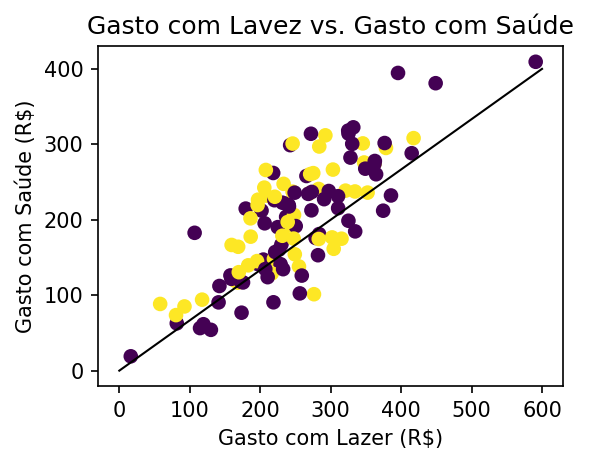

In [10]:
X = df['GASLAZER']
y = df['GASAUDE']

plt.scatter(X, y, c=df['PROFI'], label='1')
plt.title('Gasto com Lavez vs. Gasto com Saúde')
plt.xlabel('Gasto com Lazer (R$)')
plt.ylabel('Gasto com Saúde (R$)')
plt.plot([0, 600], [0, 400], 'k-', lw=1);

Perceba que profissão 1 e 2 não inteferem nessa relação pois tanto profissão 1 está relacionada em forma de reta como a profissão 2 também. Então a relação não depende da Profissão, os pontos amarelos não diferem dos pontos em lilas, seguem o mesmo padrão, ou seja, essa é uma relação que não depende da variavel Profissão

 ### Continuando a analise
 * Agora vamos fazer a analise com atributo **gasto com educação**

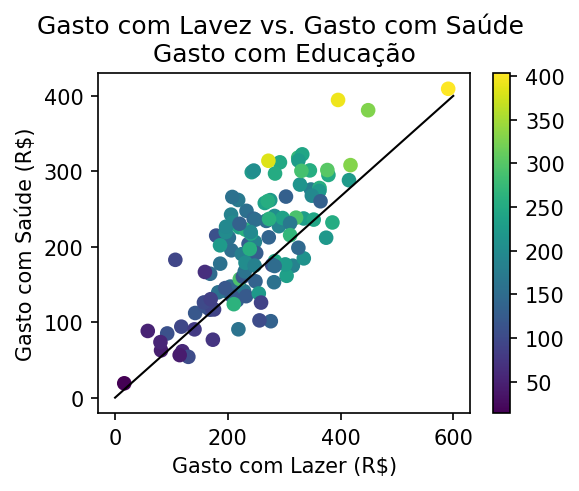

In [11]:
X = df['GASLAZER']
y = df['GASAUDE']

plt.scatter(X, y, c=df['GASTEDU'])
plt.title('Gasto com Lavez vs. Gasto com Saúde \nGasto com Educação')
plt.xlabel('Gasto com Lazer (R$)')
plt.ylabel('Gasto com Saúde (R$)')
plt.colorbar()
plt.plot([0, 600], [0, 400], 'k-', lw=1);

**Agora podemos claramente perceber uma relação linear entre Gasto com Lazer, Saúde e Educação!**

### Vamos aprodundar nossa analise, agora com 4 atributos

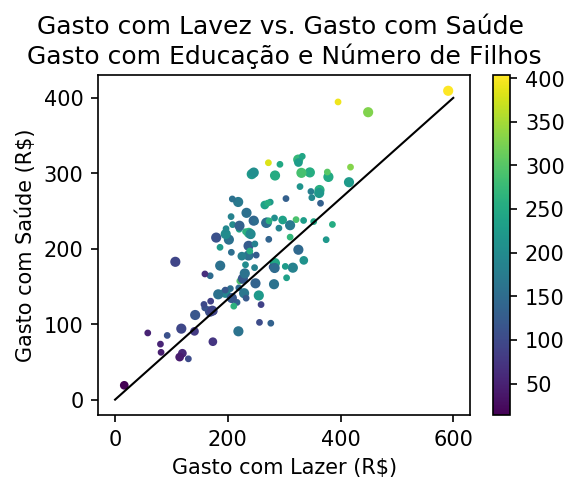

In [15]:


X = df['GASLAZER']
y = df['GASAUDE']

plt.scatter(X, y, c=df['GASTEDU'], s=df['NUNFILHOS']*5)
plt.title('Gasto com Lavez vs. Gasto com Saúde \n Gasto com Educação e Número de Filhos ')
plt.xlabel('Gasto com Lazer (R$)')
plt.ylabel('Gasto com Saúde (R$)')
plt.colorbar()
plt.plot([0, 600], [0, 400], 'k-', lw=1);